# Gender Recognition by Voice

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. It is known that looking at the mean fundamental frequency might be enough to accurately classify a voice. But one of the questions this analysis intends to answer, is what other features between males and females is important enough in differentiating a voice between a male and female, using machine learning.

# Download Dataset

Downloaded dataset from https://www.kaggle.com/primaryobjects/voicegender

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
from __future__ import print_function
import os
from io import BytesIO
from functools import partial
import PIL.Image
from IPython.display import clear_output, Image, display, HTML



%matplotlib inline


In [41]:
voice_df = pd.read_csv("voice.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [42]:
voice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


There are no null values.

In [43]:
voice_df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


### Plot Histogram for each Numerical Attribute

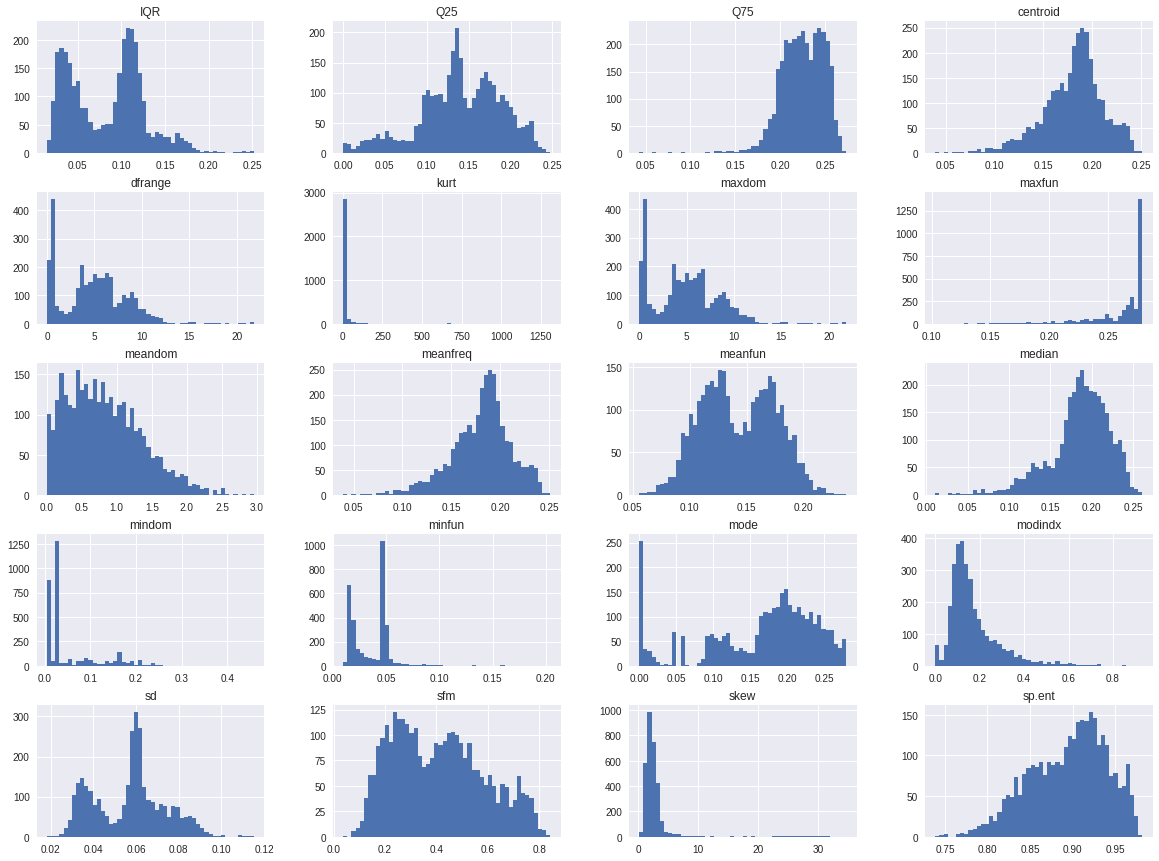

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
voice_df.hist(bins=50, figsize=(20,15))
plt.show()

In [45]:
voice_df.shape

(3168, 21)

In [46]:
voice_df['label'].value_counts() / len(voice_df)

female    0.5
male      0.5
Name: label, dtype: float64

# Test Set Creation

In [63]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(voice_df, test_size=0.2, random_state=42)

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1234)

for train_index, test_index in split.split(voice_df, voice_df['label']):
    train_set = voice_df.iloc[train_index]
    test_set = voice_df.iloc[test_index]
    

In [65]:
print("Train set:")
print(train_set['label'].value_counts() / len(train_set))

print("Test set:")
print(test_set['label'].value_counts() / len(test_set))

Train set:
female    0.5
male      0.5
Name: label, dtype: float64
Test set:
male      0.5
female    0.5
Name: label, dtype: float64


There are equal number of males vs females

In [66]:
# save train and test sets as csvs
PROCESSED_DATA_DIR = 'processed_data'
train_set.to_csv(PROCESSED_DATA_DIR + '/train_set.csv', index=False)
test_set.to_csv(PROCESSED_DATA_DIR + '/test_set.csv', index=False)

In [67]:
# copy data frame to only use train set
clean_voice_df = train_set.copy()
clean_voice_df.shape

(2534, 21)

# Exploratory Data Analysis

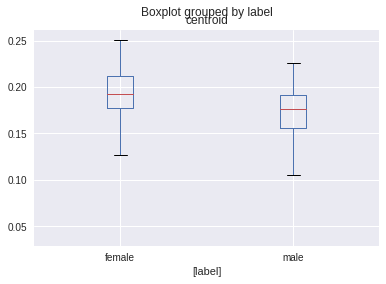

In [68]:
clean_voice_df[['centroid','label']].boxplot(by='label')

In [69]:
columns = ['label', 'sd', 'median', 'Q25',
           'Q75', 'IQR', 'skew', 'kurt','minfun', 'maxfun' ]
clean_voice_df[columns].groupby('label').mean()

,sd,median,Q25,Q75,IQR,skew,kurt,minfun,maxfun
label,,,,,,,,,
female,0.049046,0.195677,0.165644,0.222909,0.057266,2.927836,23.037474,0.039626,0.263444
male,0.065087,0.175227,0.115415,0.226132,0.110717,3.349150,49.837313,0.034136,0.252820


# Preprocessing

In [70]:
X=clean_voice_df.iloc[:, :-1]
X.head()



,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
230,0.124883,0.077808,0.113888,0.068899,0.201034,0.132135,3.990390,24.360696,0.927987,0.617386,0.000000,0.124883,0.116251,0.017410,0.258065,0.149414,0.007812,0.734375,0.726562,0.198157
419,0.194639,0.060059,0.213965,0.131422,0.245040,0.113618,1.328715,4.349309,0.913490,0.397266,0.218173,0.194639,0.115311,0.026273,0.231884,0.532878,0.125000,4.820312,4.695312,0.115749
49,0.137893,0.072421,0.119852,0.086531,0.200701,0.114170,2.010993,10.262074,0.963294,0.727047,0.059926,0.137893,0.076307,0.016211,0.128000,0.505859,0.031250,4.664062,4.632812,0.173037
2510,0.202954,0.030562,0.200549,0.184211,0.227140,0.042929,2.740855,13.350372,0.850541,0.164827,0.199268,0.202954,0.168408,0.050262,0.279070,1.828480,0.023438,8.882812,8.859375,0.119828
376,0.194088,0.061379,0.216466,0.127631,0.246827,0.119197,1.490315,4.321145,0.889230,0.364435,0.249639,0.194088,0.109250,0.036782,0.231884,0.495793,0.117188,2.164062,2.046875,0.192748


In [76]:
from sklearn.preprocessing import LabelEncoder
y=clean_voice_df.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 1, 0, 1])

In [77]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Support Vector Machine 

In [79]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.98224852071


# Conclusions

Able to develop a model (using SVM) to classify gender voices based off of acoustics.  There is a lot more interesting questions that could be asked and further analysis needed, but this is a good start.  We also could use cross validation to see if that would improve model score.



# Sources

Scikit-learn http://scikit-learn.org/stable/
Voice-Gender Dataset https://www.kaggle.com/primaryobjects/voicegender
Hands-on Machine Learning with Scikit-Learn and TensorFlow
